In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("restaurant.csv")
print(df.head())

  customer  age main_course ordered_desert
0      Tim   25         Yes            Yes
1      Sam   40         Yes             No
2      Kim   18          No            Yes
3     Mike   35         Yes            Yes
4    Kathy   50          No             No


In [61]:
# Data encoding to bring all columns numeric 
le = LabelEncoder()
df["mc_encoded"] = le.fit_transform(df["main_course"])
df["desert_encoded"] = le.fit_transform(df["ordered_desert"])

print(df.head())

  customer  age main_course ordered_desert  mc_encoded  desert_encoded
0      Tim   25         Yes            Yes           1               1
1      Sam   40         Yes             No           1               0
2      Kim   18          No            Yes           0               1
3     Mike   35         Yes            Yes           1               1
4    Kathy   50          No             No           0               0


In [62]:
features = ['age','mc_encoded']
X = df[features]
y = df['desert_encoded']
print(X)
print(y)

# split train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

   age  mc_encoded
0   25           1
1   40           1
2   18           0
3   35           1
4   50           0
5   60           0
6   65           1
7   20           1
8   65           0
9   60           0
0    1
1    0
2    1
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: desert_encoded, dtype: int64
   age  mc_encoded
5   60           0
0   25           1
7   20           1
2   18           0
9   60           0
4   50           0
3   35           1
6   65           1
5    1
0    1
7    1
2    1
9    0
4    0
3    1
6    0
Name: desert_encoded, dtype: int64


[Text(0.4, 0.875, 'age <= 42.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'mc_encoded <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'age <= 55.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

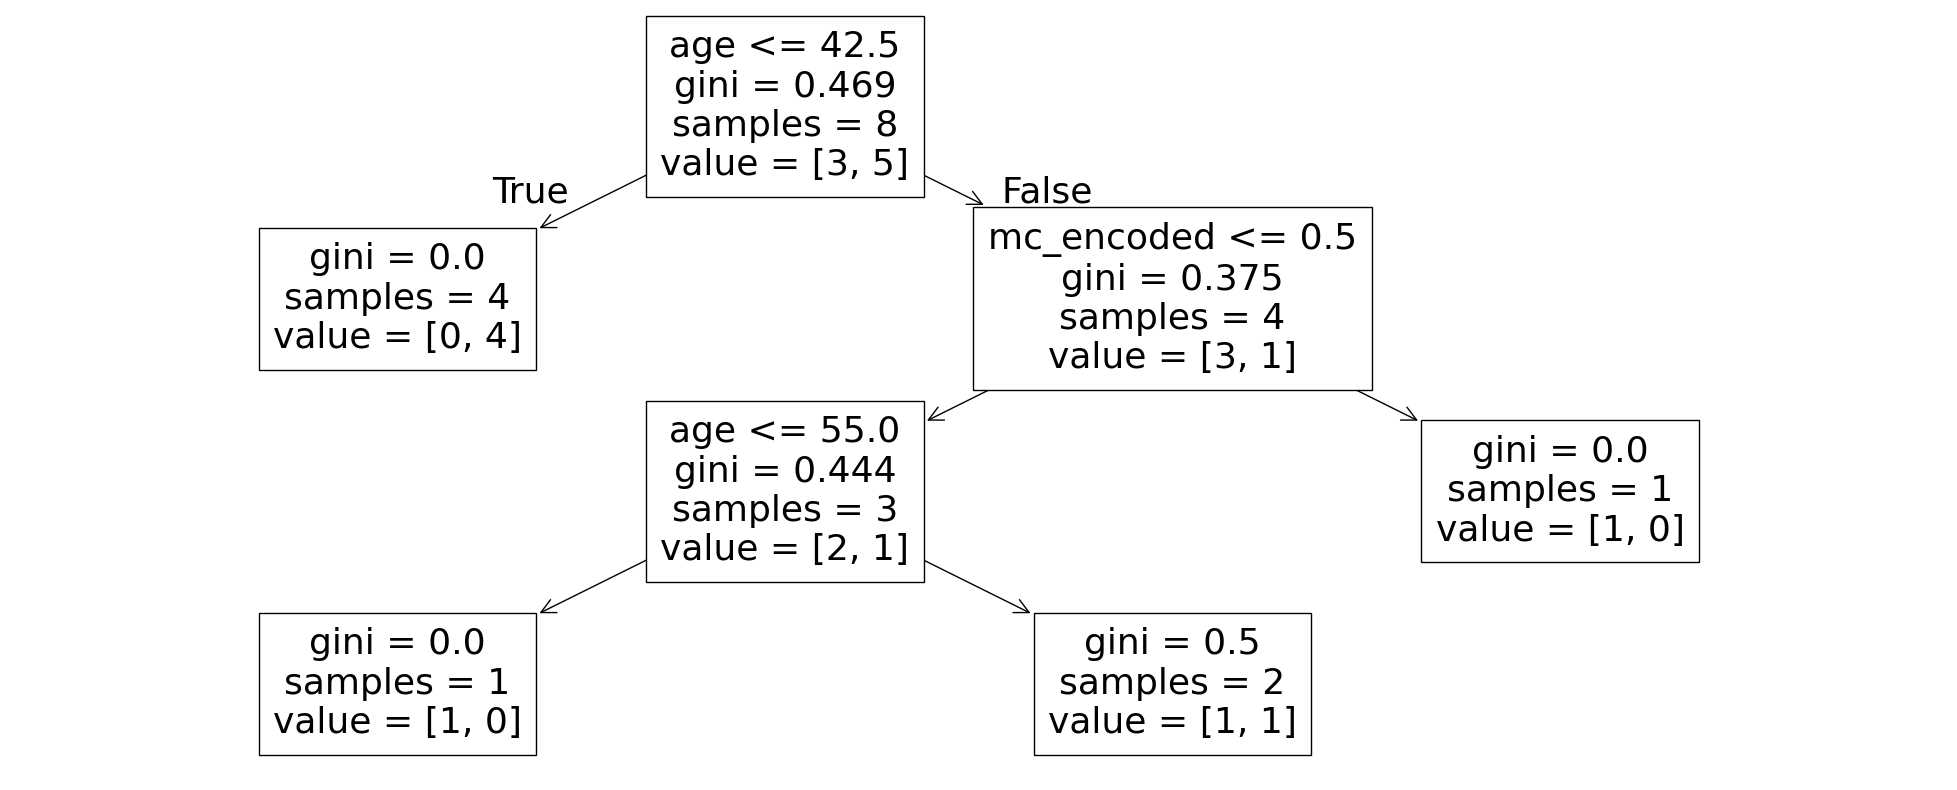

In [63]:
# Create and display a decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
plt.figure(figsize=(25, 10))
tree.plot_tree(dtree,feature_names=features)

In [67]:
# Predict values
print(X_test)
y_pred = dtree.predict(X_test)
print(y_pred)


   age  mc_encoded
8   65           0
1   40           1
[0 1]


In [70]:
# predicting score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5


In [69]:
print(X_test)

   age  mc_encoded
8   65           0
1   40           1
